Starting the recommendation system...
Loading data...
Data loaded successfully.
Preprocessing data...
Data preprocessing completed.
Splitting data into training and testing sets...
Data splitting completed.
Training model...
Model training completed.
Saving the model...
Model saved successfully.
Loading the model from the file...
Model loaded successfully.
Evaluating model...
Accuracy: 0.0
Visualizing feature importances...


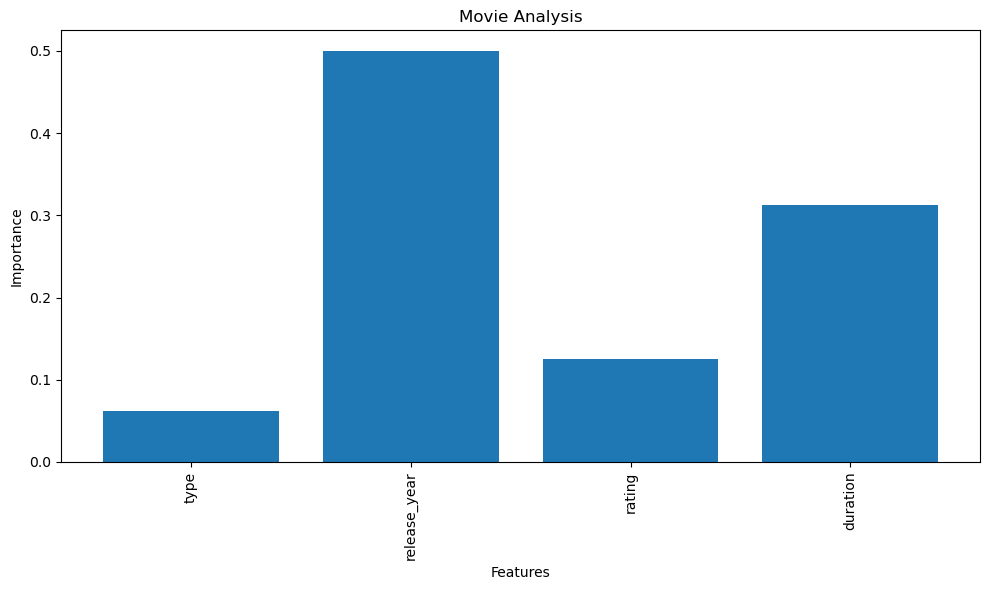

Feature importances visualized.


Enter your name:  Samson
Enter your age:  21
Enter your gender (M/F):  M
Enter your rating preference (0-9):  5
Enter your preferred release year:  2021


Samson, based on your details, you might prefer watching '#Selfie'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load

def load_data(filename, nrows=None):
    print("Loading data...")
    df = pd.read_csv(filename, nrows=nrows)
    print("Data loaded successfully.")
    return df

def preprocess_data(df):
    print("Preprocessing data...")
    
    df['rating'] = df['rating'].astype('category').cat.codes
    df['type'] = df['type'].astype('category').cat.codes

    
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
    df['duration'].fillna(df['duration'].mean(), inplace=True) 
    

    print("Data preprocessing completed.")
    return df


def train_model(X_train, y_train):
    print("Training model...")
    model = DecisionTreeClassifier(max_depth=5)  # Limit the depth of the tree for faster training
    model.fit(X_train, y_train)
    print("Model training completed.")
    return model


def evaluate_model(model, X_test, y_test):
    print("Evaluating model...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")


def predict_preference(model, new_user):
    predicted_preference = model.predict(new_user)
    return predicted_preference[0]


def visualize_feature_importances(model, feature_names):
    print("Visualizing feature importances...")
    importances = model.feature_importances_
    indices = range(len(importances))

    plt.figure(figsize=(10, 6))
    plt.title('Movie Analysis')
    plt.bar(indices, importances, align='center')
    plt.xticks(indices, feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
    print("Feature importances visualized.")


print("Starting the recommendation system...")

# Load dataset
filename = 'shows.csv'  
data = load_data(filename, nrows=1000) 


data = preprocess_data(data)

# Define features (X) and target (y)
features = ['type', 'release_year', 'rating', 'duration']
X = data[features]
y = data['title']  # Predicting based on show titles

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data splitting completed.")


model = train_model(X_train, y_train)


print("Saving the model...")
dump(model, 'show_recommendation_model.joblib')
print("Model saved successfully.")


print("Loading the model from the file...")
model = load('show_recommendation_model.joblib')
print("Model loaded successfully.")


evaluate_model(model, X_test, y_test)


visualize_feature_importances(model, features)


name = input("Enter your name: ")
age = int(input("Enter your age: "))
gender = input("Enter your gender (M/F): ").upper()
rating = int(input("Enter your rating preference (0-9): "))  

average_type = data['type'].mean()
average_duration = data['duration'].mean()
release_year = int(input("Enter your preferred release year: "))  

new_user = pd.DataFrame({
    'type': [average_type],  
    'release_year': [release_year],
    'rating': [rating],
    'duration': [average_duration]
})
predicted_show = predict_preference(model, new_user)

print(f"{name}, based on your details, you might prefer watching '{predicted_show}'.")